
✅ Accuracy: 0.7777777777777778

📋 Classification Report:
                    precision    recall  f1-score   support

 general_question       0.60      1.00      0.75         6
image_description       1.00      0.67      0.80         6
 image_generation       1.00      0.67      0.80         6

         accuracy                           0.78        18
        macro avg       0.87      0.78      0.78        18
     weighted avg       0.87      0.78      0.78        18



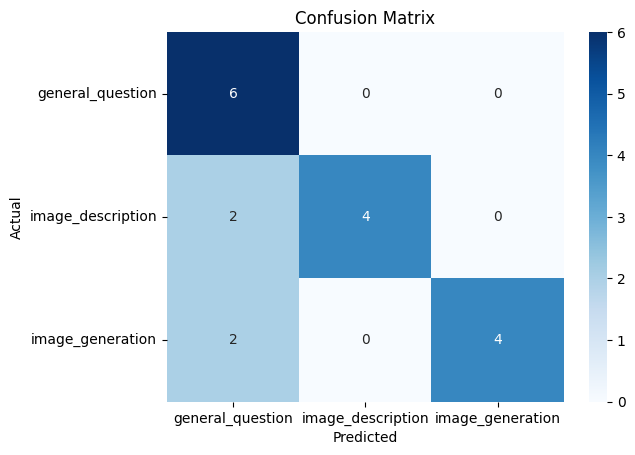


✅ Model and vectorizer saved.


In [ ]:

import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = {
    "prompt": [
        "Describe this image", "What is in the photo?", "Explain the uploaded picture",
        "What does this image contain?", "Caption this", "Analyze this image",
        "Tell me what's shown in this image", "Give a summary of the image",
        "Explain what you see in the uploaded image", "Write a caption for this image",
        "Describe what you see in this image", "Analyze the uploaded content",
        "Caption the picture", "What is this image showing?", "Summarize this image",
        "What are the objects visible?", "What's happening in this image?",
        "Identify elements in the image", "Provide an overview of the image",
        "Break down this image", "Give a description of the photo",
        "What details are in the image?", "Can you explain this photo?",
        "Describe the visual elements", "What’s the subject of this image?",
        "Write about what you see", "Explain the content of this image",
        "Make a caption for the photo", "Highlight what's in this image",
        "Describe the uploaded content",

        "Generate a picture of a mountain", "Create a futuristic robot", "Make a sketch of a cat",
        "Draw a landscape with sunset", "Illustrate a dragon", "Generate an image of space",
        "Create an ocean scene", "Make a cartoon character", "Draw a cityscape at night",
        "Illustrate a magical forest", "Draw a beach", "Generate a cartoon tiger",
        "Make a fantasy castle", "Illustrate a spaceship", "Create a picture of a robot dog",
        "Design a mythical creature", "Sketch a futuristic city", "Draw a night forest",
        "Make a 2D game character", "Create a digital art of galaxy",
        "Draw a mountain village", "Generate fantasy world", "Make anime style portrait",
        "Sketch a pirate ship", "Draw a jungle scene", "Create isometric dungeon map",
        "Draw robot fighting aliens", "Generate sketch of space rover", "Make horror themed art",
        "Design a cartoon dog",

        "What is the capital of Japan?", "Who invented gravity?", "How many continents are there?",
        "What is the speed of light?", "When was the internet invented?", "Who is the president of the USA?",
        "What is Python programming?", "What is the use of AI?", "How does electricity work?",
        "What is the history of computers?", "Who discovered America?", "What is quantum physics?",
        "Tell me about Newton's laws", "How does blockchain work?", "What is machine learning?",
        "Give me a fun fact about planets", "What is ChatGPT?", "Explain the internet",
        "How does GPS work?", "What is global warming?", "What causes rain?", "Why is the sky blue?",
        "Explain gravity", "What is data science?", "Tell me about World War 2",
        "How do airplanes fly?", "Who wrote Macbeth?", "When was electricity discovered?",
        "What is the tallest mountain?", "Who is Albert Einstein?"
    ],
    "label": (
        ["image_description"] * 30 +
        ["image_generation"] * 30 +
        ["general_question"] * 30
    )
}

df = pd.DataFrame(data)

X = df["prompt"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Optional Oversampling for balance
# ros = RandomOverSampler(random_state=42)
# X_train_vec, y_train = ros.fit_resample(X_train_vec, y_train)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

joblib.dump(model, "chatbot_intent_classifier.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("\n✅ Model and vectorizer saved.")
